In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [2]:
(X_train, Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

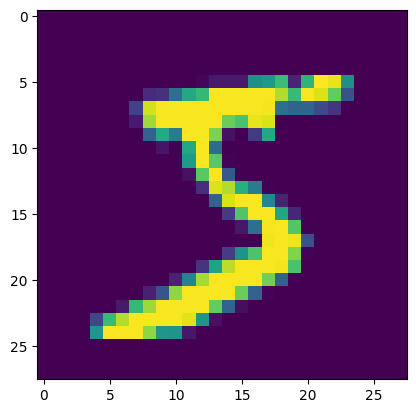

In [4]:
print(Y_train[0])
print(X_train[0])


import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255


In [6]:
# with no padding
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu' , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu' ))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [24]:
# with padding
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',strides = (2,2), activation= 'relu' , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',strides = (2,2), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',strides = (2,2), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu' ))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])
history = model.fit(X_train,Y_train, validation_split= 0.2 , epochs = 10  )

Epoch 1/10
1500/1500 [==============================] - 13s 5ms/step - loss: 0.2881 - accuracy: 0.9076 - val_loss: 0.0949 - val_accuracy: 0.9703
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0957 - accuracy: 0.9703 - val_loss: 0.0685 - val_accuracy: 0.9793
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.0645 - val_accuracy: 0.9798
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0903 - val_accuracy: 0.9731
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0490 - accuracy: 0.9839 - val_loss: 0.0635 - val_accuracy: 0.9810
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0659 - val_accuracy: 0.9822
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0628 - val_accuracy

In [9]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


0.9809

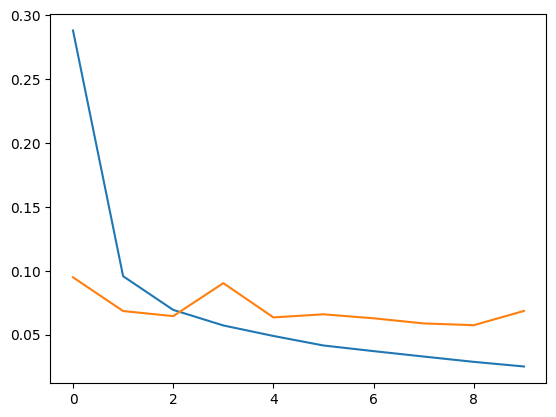

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

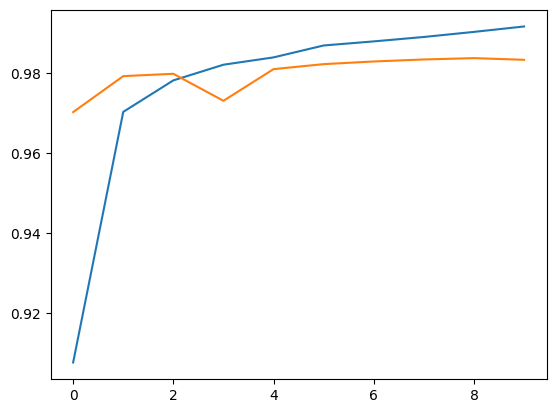

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])